In [1]:
# load libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
# load in new csv to merge with geodata
df = pd.read_csv("datasets/positivos_covid31072020.csv")#, header=0, encoding="utf-8")

In [2]:
df.head()
#df.info()

,UUID,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO,FECHA_RESULTADO
0,7320cabdc1aaca6c59014cae76a134e6,CAJAMARCA,JAEN,JAEN,PCR,64.0,MASCULINO,20200715
1,e81602051997ace8340bb8c18fe24c65,LIMA,EN INVESTIGACIÓN,EN INVESTIGACIÓN,PCR,68.0,MASCULINO,20200716
2,cecdbf10074dbc011ae05b3cbd320a6f,LIMA,LIMA,LOS OLIVOS,PCR,52.0,MASCULINO,20200716
3,71ecb6bccb248b0bb2ac72ed51b5e979,LIMA,EN INVESTIGACIÓN,EN INVESTIGACIÓN,PCR,42.0,MASCULINO,20200716
4,566af4276cbe9359abe93f9aa86396c3,CALLAO,CALLAO,BELLAVISTA,PCR,34.0,MASCULINO,20200716


In [4]:
# filter to include only data labeled as 'Violence Against the Person'
filtered = df['DEPARTAMENTO'] == 'CUSCO'
infected = df[filtered]
#clean data
infected = infected.replace(regex={'Á':'A','É':'E','Í':'I','Ó':'O','Ú':'U','À':'A','È':'E','Ì':'I','Ò':'O','Ù':'U'})

# data format
date_test = 'FECHA_RESULTADO'
# pruebas rapidas diferente formato de 
pr = infected['TIPO_PRUEBA'] == 'PR'
pr = infected[pr]
pr[date_test] = pd.to_datetime(pr[date_test],format='%Y-%m-%d')
pr.style.format({date_test: lambda t: t.strftime("%Y-%m-%d")})
# pr['FECHA_NACIMIENTO'] = pd.to_datetime(pr['FECHA_NACIMIENTO'],format='%Y-%m-%d')
# pr
# pruebas moleculares con otro formatos de fecha
# pruebas rapidas diferente formato de 
pcr = infected['TIPO_PRUEBA'] == 'PCR'
pcr = infected[pcr]
pcr[date_test] = pd.to_datetime(pcr[date_test],format='%d/%m/%Y')
pcr.style.format({date_test: lambda t: t.strftime("%Y-%m-%d")})
# pr['FECHA_NACIMIENTO'] = pd.to_datetime(pr['FECHA_NACIMIENTO'],format='%d/%m/%Y')
#pcr
frames = [pr,pcr]
df_dpto_merged = pd.concat(frames)
df_dpto_merged

KeyError: 'TIPO_PRUEBA'

In [11]:
# groupby to get the sum of each by borough
# df.groupby(['name', 'day']).sum() \
#   .groupby(level=0).cumsum().reset_index()
df_group_count = df_dpto_merged.groupby(['FECHA_PRUEBA','PROVINCIA']).size().reset_index(name='COUNTS')
df_group_count = df_group_count.sort_values('FECHA_PRUEBA',ascending=True)
# df_group_count = df_group_count.groupby(['FECHA_PRUEBA','PROVINCIA']).sum().groupby(level=0).cumsum().reset_index()
# df_group_count['no_cumulative'] = df_group_count.groupby(['PROVINCIA'])['COUNTS'].apply(lambda x: x.cumsum())
# df_group_count['index'] = df_group_count.index + 1
df_group_count = df_group_count.set_index(['PROVINCIA','FECHA_PRUEBA']).sort_index()
# df_group_count.to_csv("df_merged_infected.csv")
df_group_count

COUNTS
PROVINCIA FECHA_PRUEBA        
ACOMAYO   2020-05-11         2
          2020-05-12         3
          2020-05-13         9
ANTA      2020-04-09         1
          2020-04-18         1
...                        ...
URUBAMBA  2020-04-28         1
          2020-04-30         1
          2020-05-02         1
          2020-05-11         2
          2020-05-13         5

[171 rows x 1 columns]

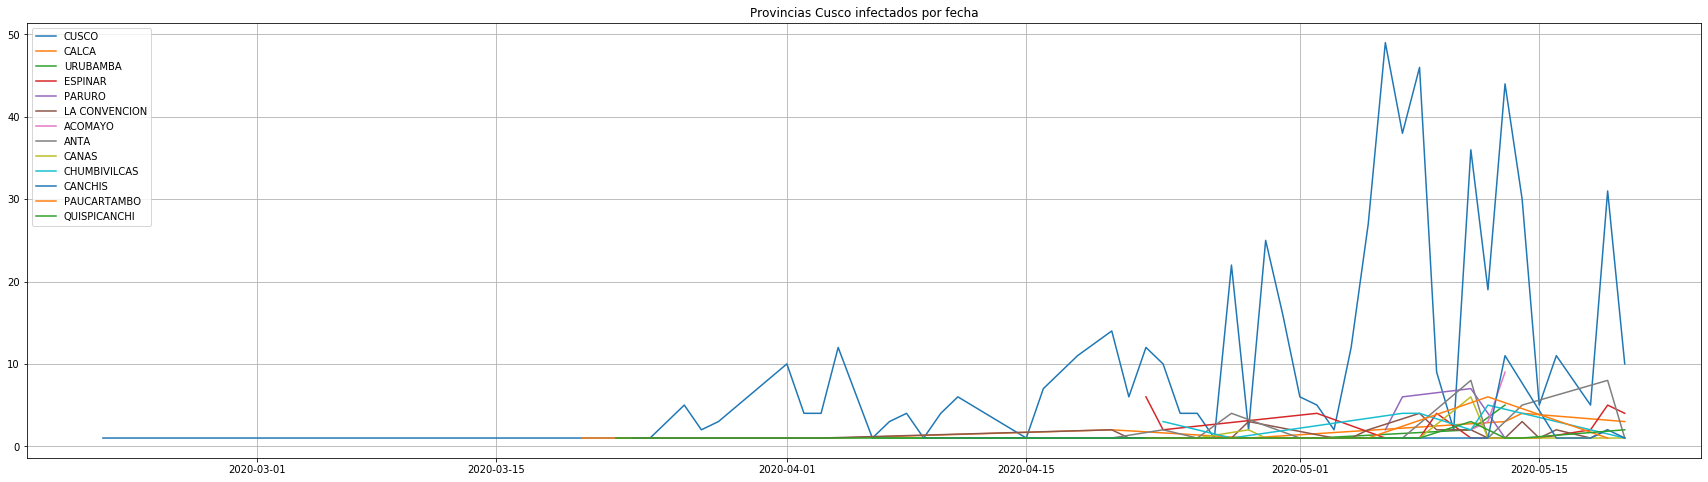

In [38]:
plt.figure(figsize = (30, 8))
def provincia_plot(name):
    data = df_group_count.loc[name]

    plt.plot(data.index, data.values)
# provincia_plot('CUSCO')

names = df_dpto_merged['PROVINCIA'].unique().tolist()
# names

for name in names:
    provincia_plot(name)

plt.legend(names)
plt.title('Provincias Cusco infectados por fecha')
plt.grid(True)


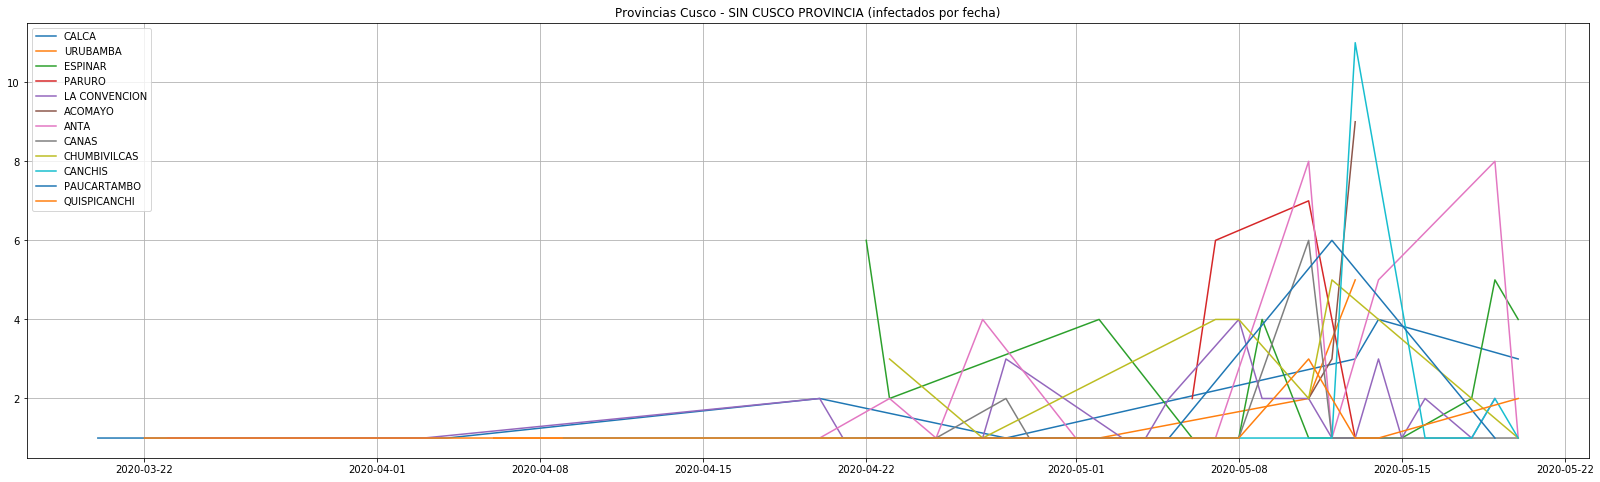

In [39]:
sin_cusco = names.copy()
sin_cusco.remove('CUSCO')
plt.figure(figsize = (28, 8))
for name in sin_cusco:
    provincia_plot(name)

plt.legend(sin_cusco)
plt.title('Provincias Cusco - SIN CUSCO PROVINCIA (infectados por fecha)')
plt.grid(True)



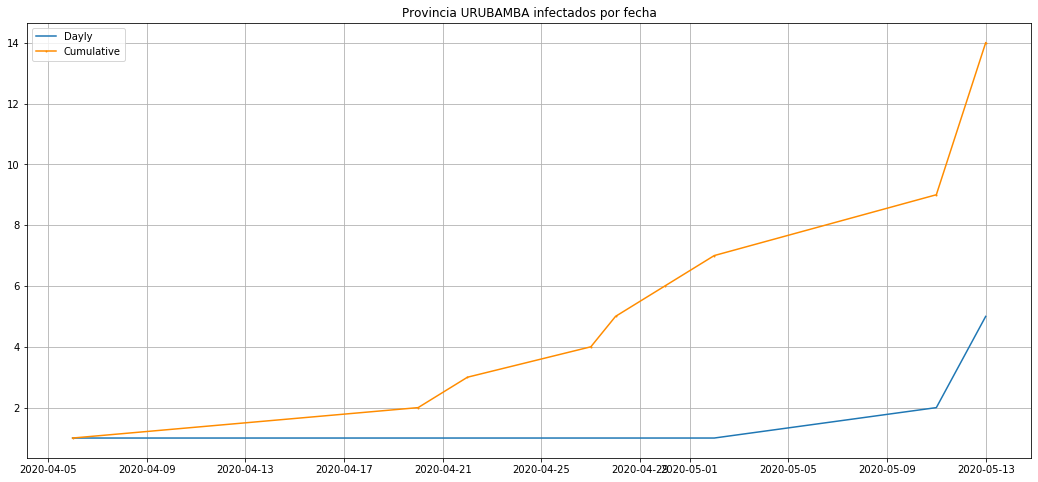

In [41]:
plt.figure(figsize = (18, 8))
provincia = "URUBAMBA"
provincia_plot(provincia)
#ACUMULATIVE 
data = df_group_count.loc[provincia]
plt.plot(data.index, np.cumsum(data.values), color='darkorange', marker='o', linestyle='-', markersize = 1, label = "Cumulative" )
plt.legend(["Dayly","Cumulative"])
plt.title("Provincia "+provincia+" infectados por fecha")
plt.grid(True)

In [156]:
df_drop = df_group_count.drop(columns=['index'])
df_pivot = df_drop.groupby(['FECHA_PRUEBA','PROVINCIA'],as_index = False).count().pivot('PROVINCIA','FECHA_PRUEBA').fillna(0)
df_pivot
# df_pivot = df_pivot.cumsum(axis=1)
# df_pivot.to_csv("df_merged_infected.csv")


COUNTS                                              \
FECHA_PRUEBA  2020-02-21 2020-03-06 2020-03-18 2020-03-20 2020-03-21   
PROVINCIA                                                              
ACOMAYO              0.0        0.0        0.0        0.0        0.0   
ANTA                 0.0        0.0        0.0        0.0        0.0   
CALCA                0.0        0.0        0.0        1.0        0.0   
CANAS                0.0        0.0        0.0        0.0        0.0   
CANCHIS              0.0        0.0        0.0        0.0        0.0   
CHUMBIVILCAS         0.0        0.0        0.0        0.0        0.0   
CUSCO                1.0        1.0        1.0        1.0        1.0   
ESPINAR              0.0        0.0        0.0        0.0        0.0   
LA CONVENCION        0.0        0.0        0.0        0.0        0.0   
PARURO               0.0        0.0        0.0        0.0        0.0   
PAUCARTAMBO          0.0        0.0        0.0        0.0        0.0   
QUISPICANCHI         0.0        0.0        0.0        0.0        0.0   
URUBAMBA             0.0        0.0        0.0        0.0        0.0   

                                                                      ...  \
FECHA_PRUEBA  2020-03-22 2020-03-23 2020-03-24 2020-03-25 2020-03-26  ...   
PROVINCIA                                                             ...   
ACOMAYO              0.0        0.0        0.0        0.0        0.0  ...   
ANTA                 0.0        0.0        0.0        0.0        0.0  ...   
CALCA                0.0        0.0        0.0        0.0        0.0  ...   
CANAS                0.0        0.0        0.0        0.0        0.0  ...   
CANCHIS              0.0        0.0        0.0        0.0        0.0  ...   
CHUMBIVILCAS         0.0        0.0        0.0        0.0        0.0  ...   
CUSCO                0.0        0.0        1.0        1.0        1.0  ...   
ESPINAR              0.0        0.0        0.0        0.0        0.0  ...   
LA CONVENCION        0.0        1.0        0.0        0.0        0.0  ...   
PARURO               0.0        0.0        0.0        0.0        0.0  ...   
PAUCARTAMBO          0.0        0.0        0.0        0.0        0.0  ...   
QUISPICANCHI         1.0        0.0        0.0        0.0        0.0  ...   
URUBAMBA             0.0        0.0        0.0        0.0        0.0  ...   

              no_cumulative                                              \
FECHA_PRUEBA     2020-05-11 2020-05-12 2020-05-13 2020-05-14 2020-05-15   
PROVINCIA                                                                 
ACOMAYO                 1.0        1.0        1.0        0.0        0.0   
ANTA                    1.0        1.0        0.0        1.0        0.0   
CALCA                   0.0        0.0        1.0        1.0        0.0   
CANAS                   1.0        1.0        0.0        0.0        0.0   
CANCHIS                 1.0        1.0        1.0        0.0        0.0   
CHUMBIVILCAS            1.0        1.0        0.0        0.0        0.0   
CUSCO                   1.0        1.0        1.0        1.0        1.0   
ESPINAR                 1.0        0.0        0.0        0.0        1.0   
LA CONVENCION           1.0        1.0        1.0        1.0        1.0   
PARURO                  1.0        0.0        1.0        0.0        0.0   
PAUCARTAMBO             0.0        1.0        0.0        0.0        0.0   
QUISPICANCHI            1.0        0.0        1.0        1.0        0.0   
URUBAMBA                1.0        0.0        1.0        0.0        0.0   

                                                                      
FECHA_PRUEBA  2020-05-16 2020-05-17 2020-05-18 2020-05-19 2020-05-20  
PROVINCIA                                                             
ACOMAYO              0.0        0.0        0.0        0.0        0.0  
ANTA                 0.0        0.0        0.0        1.0        1.0  
CALCA                0.0        0.0        0.0        0.0        1.0  
CANAS